<a href="https://colab.research.google.com/github/susuusub/projectmanager/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <<20230901 등락률 TOP 30위 종목들의 상위 업종 추출하기>>
- 시각화: 막대그래프, 워드클라우드
- 상위업종의 네이버 뉴스 검색하기 (네이버 openAPI 활용)

데이터 출처: KRX 정보데이터시스템
http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#한글폰트
import matplotlib.font_manager as fm

font_list_win = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(f'windows 폰트 목록 : {font_list_win}')

windows 폰트 목록 : ['/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation

In [ ]:

file2='./sample_data/업종분류현황_20230901.csv'


In [ ]:
df2= pd.read_csv(file2, encoding='CP949')

#등락률 상위 30개 데이터 추출
df_top=df2.sort_values('등락률',ascending=False).head(30)
#top_list=df_top['종목명'].head(10)
#top_list
df_top


,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
741,003075,코오롱글로벌우,KOSPI,건설업,21800,5000,29.76,16148066600
838,053690,한미글로벌,KOSPI,서비스업,28850,5050,21.22,316125317500
245,000325,노루홀딩스우,KOSPI,기타금융,30000,4750,18.81,7306770000
432,001470,삼부토건,KOSPI,건설업,3900,420,12.07,796611090600
656,014990,인디에프,KOSPI,섬유의복,1023,98,10.59,76840593885
740,003070,코오롱글로벌,KOSPI,건설업,12560,1180,10.37,237794875280
633,000227,유유제약2우B,KOSPI,의약품,12180,990,8.85,3965320800
765,004100,태양금속,KOSPI,운수장비,3425,275,8.73,125697500000
906,307950,현대오토에버,KOSPI,서비스업,189900,14200,8.08,5207814181800
260,353200,대덕전자,KOSPI,전기전자,31050,2150,7.44,1534395521250


In [ ]:
top_group=df_top.groupby('업종명').count().sort_values('종목코드',ascending=False)
top_group

,종목코드,종목명,시장구분,종가,대비,등락률,시가총액
업종명,,,,,,,
건설업,4,4,4,4,4,4,4
서비스업,4,4,4,4,4,4,4
전기전자,4,4,4,4,4,4,4
운수장비,3,3,3,3,3,3,3
철강금속,3,3,3,3,3,3,3
기계,2,2,2,2,2,2,2
기타금융,2,2,2,2,2,2,2
유통업,2,2,2,2,2,2,2
기타제조업,1,1,1,1,1,1,1


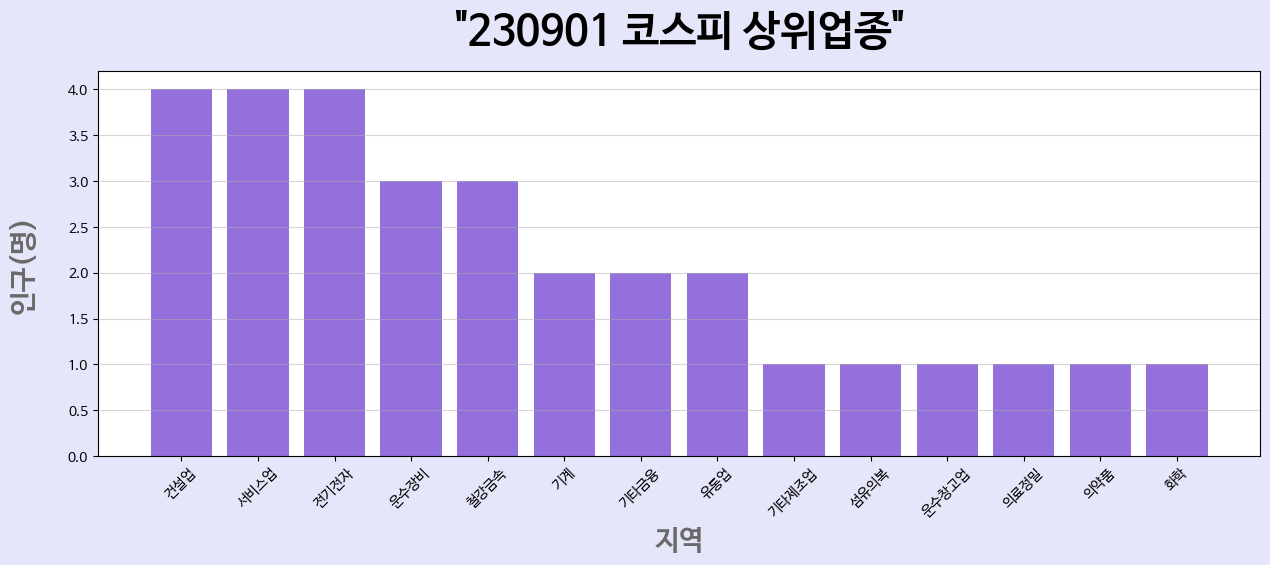

In [ ]:
#막대그래프
import matplotlib.pyplot as plt
#한글폰트
plt.rc('font', family='NanumBarunGothic')

# 1.그래프 데이터 지정하기(X축, Y축)
x =   top_group.index # 업종명
y =   top_group['종목코드']# 업종별 종목개수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"230901 코스피 상위업종"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기


plt.show() # 그래프 그리기


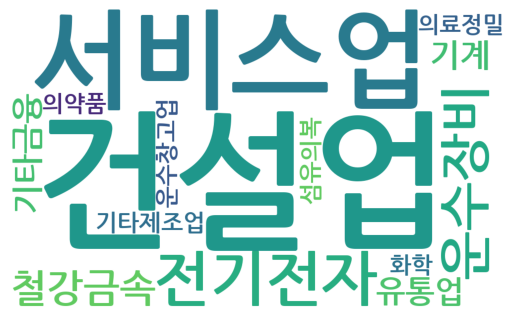

In [ ]:
#워드클라우드로 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#폰트
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

names =   top_group.index # 업종명
counts =   top_group['종목코드']# 업종별 종목개수
data=dict(zip(names,counts)) #딕셔너리

#워드 클라우드로 시각화하기
wc=WordCloud(width=1000, height=600, background_color='white',font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis('off')
plt.show()

In [ ]:
# df에서 상위 업종 네이버 openapi 활용해 뉴스 검색
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = 'bMFXtZLgNFVqhtACREgQ'  # 자신의 client_id
client_pw = 'BcEkeH3OiL'            # 자신의 client_secret

#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):

    data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}

    jsonResult.append(data)
    datas.append(data)

    return
#[CODE 0]
def main():
    node= 'news'

    srcText = top_group.index[0] #건설업

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, srcText, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, srcText, start, total)
#     print(f'가져올 데이터 : {total} 건')

    with open(f'./sample_data/naver_{node}_{srcText}', 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))

     # csv 파일로 저장하기
    file = f'./sample_data/naver_{node}_{srcText}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'./sample_data/naver_{node}_{srcText}.csv SAVED')
    return df
#-----------
# 시작
#-----------
df = main()
df

[2023년09월03일 16시14분36초] Url Request Success
HTTP Error 400: Bad Request
[2023년09월03일 16시14분36초] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EA%B1%B4%EC%84%A4%EC%97%85&start=101&display=460396
가져온 데이터 : 100 건
./sample_data/naver_news_건설업.csv SAVED


,제목,링크,내용
0,경북 단체장들 줄줄이 수사·재판…'행정공백' 어쩌나,http://www.kyongbuk.co.kr/news/articleView.htm...,이들과 다르게 김주수 의성군수는 지난 2017년 <b>건설업</b>자로부터 뇌물을 ...
1,"[외국인 연일 매매 특징주] '누가 사고, 누가 팔길래' 삼부토건·코다코 '중소...",https://www.thekpm.com/news/articleView.html?i...,"사진=삼부토건 삼부토건은 국내<b>건설업</b>부문(삼부토건, 삼부르네상스, 삼부르..."
2,[르포] 외국인 취업 門 연다지만...자영업자 “고용비율 제한부터 풀어야”,https://www.etoday.co.kr/news/view/2276025,일부 업종에 제한된 만큼 음식점·카페·편의점과 호텔 등 서비스업종에서도 합법적으로 ...
3,추석 닥치는데…대구·경북 체불임금 어쩌나,https://www.idaegu.co.kr/news/articleView.html...,<b>건설업</b>의 임금체불 비중이 여전히 높은 수준인 것으로 나타났다. 3일 대...
4,김미정 계룡시의원 &quot;더오름은 부동산 업자…시와 결탁&quot; 파문,http://www.goodmorningcc.com/news/articleView....,또 &quot;더오름은 ▲부동산개발 및 컨설팅업 ▲주택 <b>건설업</b> 등 부동...
...,...,...,...
95,양정숙 &quot;변호사 압수수색 변론 침해…국회 비밀유지권 빨리 통과&quot;,http://www.lawleader.co.kr/news/articleView.ht...,"<b>건설업</b>계 철근 누락 부실시공 사태에서도 보듯, 준법 감시ㆍ준법지원인의 ..."
96,올 하반기 <b>건설업</b> 하루 평균 임금 26.5만원…전년보다 6.71% 상승,https://economist.co.kr/article/view/ecn202309...,"올해 하반기 전체 <b>건설업</b> 하루 평균 임금은 26만5516원으로, 지난해..."
97,"[마감시황] 코스피, '7만전자' 상승세에 0.29p↑",http://www.newspim.com/news/view/20230901000824,"업종별로는 섬유·의복(0.40%), 종이·목재(0.17%), 전기전자(1.90%),..."
98,"코스피, 삼성전자 독주에 강보합…외인 6거래일 만에 '사자'(종합)",https://www.yna.co.kr/view/AKR2023090110945100...,"업종별로는 기계(-2.14%), 철강 및 금속(-1.97%), 운수장비(-1.40%..."


데이터 분석 결과: 어떤 업종이 가장 많이 올랐고, 어떠한 이유때문에 상승했는지 뉴스데이터 검색결과로 알 수 있다.